In [1]:
import xarray as xr
import numpy as np
#np.set_printoptions(threshold=np.nan)
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d

In [2]:
state = xr.open_dataset('/Users/weiyangbao/Desktop/sill12/state_002.nc')

In [7]:

sill_depth = 12
Zgrid = int(sill_depth / 3)
grid_size = 200 * 3
y = state.Y.data[1:10]
z0 = state.Z.data
z1 = np.arange(-1.5,-150,-3)
    
Q1_out = np.empty(len(state.T))
Q1_in = np.empty(len(state.T))
Q2_out = np.empty(len(state.T))
Q2_in  = np.empty(len(state.T))
Q1 = np.empty(len(state.T))
Q2 = np.empty(len(state.T))

for t in range(len(state.T)):
    u = state.U.isel(T = t)
    u_sill = (u.data[:, 1:10, 29]) # Profile above the sill crest
    u_front = (u.data[:, 1:10, 2]) # Profile near the ice front
    f_u1 = interp2d(y, z0, u_sill) # Interpolate in Z direction
    f_u2 = interp2d(y, z0, u_front)
    u_sill_interp = f_u1(y, z1)
    u_front_interp = f_u2(y, z1)
    Qs = u_sill_interp[-Zgrid:,:] * grid_size
    Qf = u_front_interp * grid_size
    Q1_out[t] = Qs[Qs > 0].sum()
    Q1_in[t] = Qs[Qs < 0].sum()
    Q1[t] = Q1_in[t] + Q1_out[t]
    Q2_out[t] = Qf[Qf < 0].sum()
    Q2_in[t] = Qf[Qf > 0].sum()
    Q2[t] = Q2_in[t] + Q2_out[t]
    
Q2.mean()

289.66666822859537

In [56]:
u_sill_interp[-Zgrid:,:]

array([[-0.22549886, -0.22557048, -0.22611836, -0.22683673, -0.22712512,
        -0.22675675, -0.22614458, -0.22573948, -0.22568801],
       [-0.13061908, -0.13645533, -0.1419089 , -0.14499508, -0.1456183 ,
        -0.14496252, -0.14139979, -0.13530417, -0.12961738],
       [ 0.1414017 ,  0.13616733,  0.12279516,  0.10652682,  0.09628216,
         0.1059983 ,  0.12189982,  0.1361988 ,  0.14315551],
       [ 0.22701009,  0.20187011,  0.17281545,  0.14776289,  0.13439103,
         0.15119787,  0.17695682,  0.20541078,  0.22944067]])

In [69]:
x = state.U.isel(T=211) == state.U.isel(T=212)

In [75]:
x[1,1]

<xarray.DataArray 'U' (Xp1: 51)>
array([ True,  True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,  True,
        True])
Coordinates:
  * Xp1      (Xp1) float64 0.0 200.0 400.0 600.0 ... 9.6e+03 9.8e+03 1e+04
    Y        float64 300.0
    Z        float64 -0.75

In [ ]:
x==False

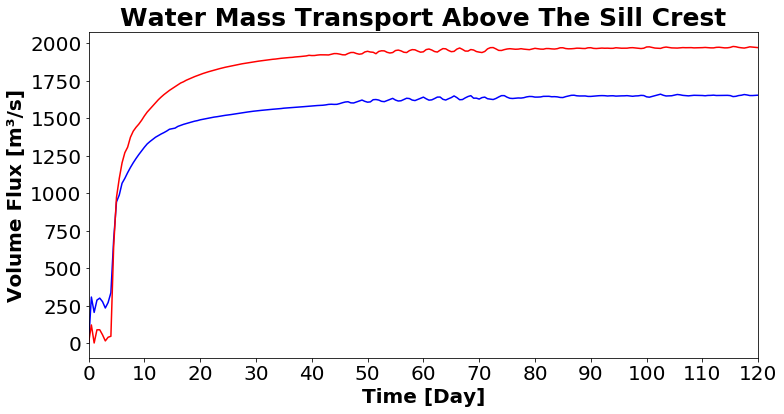

In [20]:
fig, ax =plt.subplots(figsize=(12,6))
ax.set_xlim([0,240])
ax.set_xticks(np.linspace(0,240,13))
ax.set_xticklabels(np.linspace(0,120,13, dtype = int), size = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Time [Day]", size = 20, weight = 'bold')
plt.ylabel("Volume Flux [m\u00B3/s]", size = 20, weight = 'bold')
plt.plot(Q1_out, "b-", linewidth=1.5, label='Q_out')
plt.plot(Q1_in, "r-", linewidth=1.5, label='Q_in')
#plt.legend(loc = 'right', fontsize = 15)
#plt.plot(Q1_in + Q2_in - Q1_out - Q2_out, "k-", linewidth=1.5, label='Q_in')
plt.title("Water Mass Transport Above The Sill Crest", size = 25, weight = 'bold')
plt.show()